# **MNIST WEBCAM CODE**

Import

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

Load MNIST dataset

In [15]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Data normalization

In [16]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

 Data augmentation

In [17]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(x_train)

Model

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model with augmented data

In [20]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 88s 46ms/step - loss: 0.3046 - accuracy: 0.9032 - val_loss: 0.0450 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1181 - accuracy: 0.9630 - val_loss: 0.0309 - val_accuracy: 0.9894
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0889 - accuracy: 0.9735 - val_loss: 0.0341 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0769 - accuracy: 0.9769 - val_loss: 0.0231 - val_accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0652 - accuracy: 0.9797 - val_loss: 0.0218 - val_accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0198 - val_accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0199 -

Evaluate the model

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0202 - accuracy: 0.9931
Test accuracy: 0.9930999875068665


1/1 [==============================] - 0s 89ms/step


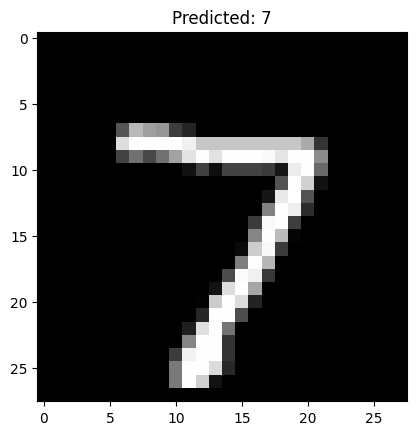

In [22]:
# Assuming 'model' is your trained CNN model

import numpy as np
import matplotlib.pyplot as plt

# Choose an image from the test set for prediction
image_index = 0  # Change this index as needed
sample_image = x_test[image_index].reshape(1, 28, 28, 1)

# Make a prediction
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


1/1 [==============================] - 0s 21ms/step


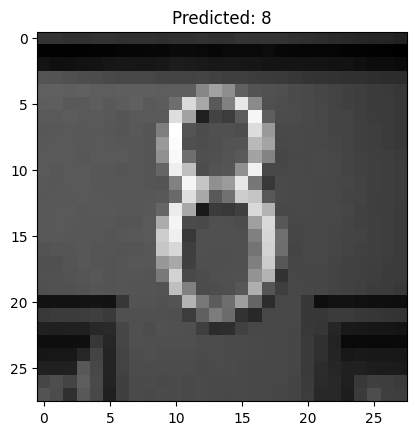

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File path of the image you want to predict
file_path = '/content/1.jpg'  # Change this to your image file path

# Read the image using OpenCV
input_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to match the MNIST input shape (28x28)
resized_image = cv2.resize(input_image, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize the pixel values
normalized_image = resized_image / 255.0

# Reshape the image to fit the CNN model input shape
sample_image = normalized_image.reshape(1, 28, 28, 1)

# Make a prediction using the model
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(resized_image, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


1/1 [==============================] - 0s 23ms/step


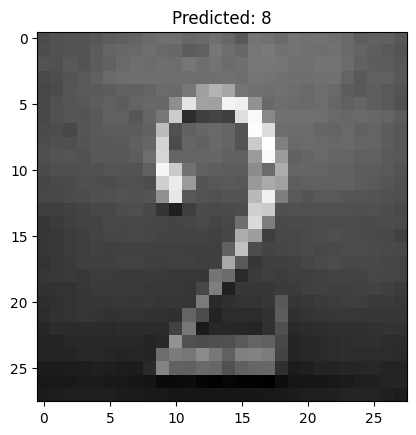

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File path of the image you want to predict
file_path = '/content/2.jpg'  # Change this to your image file path

# Read the image using OpenCV
input_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to match the MNIST input shape (28x28)
resized_image = cv2.resize(input_image, (28, 28), interpolation=cv2.INTER_AREA)

# Normalize the pixel values
normalized_image = resized_image / 255.0

# Reshape the image to fit the CNN model input shape
sample_image = normalized_image.reshape(1, 28, 28, 1)

# Make a prediction using the model
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(resized_image, cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


In [28]:
# Save the model
model.save('mnist_simple_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
